Setup const variables

In [12]:
api_key = 'mdeqlkih5n1165zrzr12ef7h'
api_secret = '2i226o40eck9h9cbfp3gus6mvdc72bt5u22bf16cybje5a1071'
output_file_sales = "data/drug_crime.csv"
output_file_drug_related = "data/drug_related_crime.csv"

Create Dataframe using Socrates API - filter using query for **controlled substance sales**.
Save to csv.

In [13]:
import pandas as pd
from io import StringIO

import requests
from requests.auth import HTTPBasicAuth
from urllib.parse import quote

limit = 84838
offset = 0

filters = quote("""
                $where=pd_desc like '%CONTROLLED%SUBSTANCE%SALE%'
                """.strip(), safe=':/?&=')
print("Filters:", filters)

drugs_sales_df = pd.DataFrame()
while True:
    url = f"""
    https://data.cityofnewyork.us/resource/qgea-i56i.csv?{filters}&$limit={limit}&$offset={offset}
    """.strip()
    response = requests.get(url, auth=HTTPBasicAuth(api_key, api_secret))

    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df_temp = pd.read_csv(csv_data)

        # If df is not empty, append the new data
        if not df_temp.empty:
            print(f"Retrieved {offset + limit} records")
            drugs_sales_df = pd.concat([drugs_sales_df, df_temp])
            offset += limit
        else:
            break
    else:
        raise Exception(f"Failed to retrieve data. Status code: {response.status_code}", response.json())
    
# Save to file
drugs_sales_df.to_csv(output_file_sales, index=False)
print("Saved to file", output_file_sales)


Filters: %24where=pd_desc%20like%20%27%25CONTROLLED%25SUBSTANCE%25SALE%25%27
Retrieved 84838 records
Saved to file data/drug_crime.csv


Create Dataframe using Socrates API - filter using query for **all drug related offenses**.
Save to csv.

In [14]:
import pandas as pd
from io import StringIO

import requests
from requests.auth import HTTPBasicAuth
from urllib.parse import quote

limit = 84838
offset = 0

filters = quote("""
                $where=ofns_desc like '%DRUG%'
                """.strip(), safe=':/?&=')
print("Filters:", filters)

drugs_related_df = pd.DataFrame()
while True:
    url = f"""
    https://data.cityofnewyork.us/resource/qgea-i56i.csv?{filters}&$limit={limit}&$offset={offset}
    """.strip()
    response = requests.get(url, auth=HTTPBasicAuth(api_key, api_secret))

    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df_temp = pd.read_csv(csv_data)

        # If df is not empty, append the new data
        if not df_temp.empty:
            print(f"Retrieved {offset + limit} records")
            drugs_related_df = pd.concat([drugs_sales_df, df_temp])
            offset += limit
        else:
            break
    else:
        raise Exception(f"Failed to retrieve data. Status code: {response.status_code}", response.json())
    
# Save to file
drugs_related_df.to_csv(output_file_drug_related, index=False)
print("Saved to file", output_file_drug_related)


Filters: %24where=ofns_desc%20like%20%27%25DRUG%25%27
Retrieved 84838 records
Retrieved 169676 records
Retrieved 254514 records
Retrieved 339352 records
Retrieved 424190 records
Retrieved 509028 records
Saved to file data/drug_related_crime.csv


Read saved data from files (used here as cache)

In [15]:
import pandas as pd
drugs_sales_df = pd.read_csv(output_file_sales)
drugs_related_df = pd.read_csv(output_file_drug_related)

List all columns for both dataframes (Drug sales and Drug related).
Create `year` column for visualization readability.

In [16]:
print("Cols", drugs_related_df.columns)
drugs_related_df.dropna(subset=['cmplnt_fr_dt'], inplace=True)
drugs_related_df['year'] = pd.to_datetime(drugs_related_df['cmplnt_fr_dt']).dt.year.astype(int)
drugs_related_df.head()

Cols Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex'],
      dtype='object')


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex,year
0,279732887,2023-12-30T00:00:00.000,20:00:00,2023-12-30T00:00:00.000,20:15:00,46.0,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,520,...,NaN,40.858387,-73.900566,"(40.858387, -73.900566)",PATROL BORO BRONX,(null),UNKNOWN,UNKNOWN,E,2023
1,279727230,2023-12-24T00:00:00.000,18:38:00,2023-12-24T00:00:00.000,18:38:00,108.0,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,512,...,NaN,40.747120,-73.942382,"(40.747120382561384, -73.94238226542083)",PATROL BORO QUEENS NORTH,(null),UNKNOWN,UNKNOWN,E,2023
2,279714402,2023-12-30T00:00:00.000,11:48:00,2023-12-30T00:00:00.000,11:49:00,5.0,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,521,...,NaN,40.716337,-74.001251,"(40.716337, -74.001251)",PATROL BORO MAN SOUTH,(null),UNKNOWN,UNKNOWN,E,2023
3,279682885,2023-12-29T00:00:00.000,14:18:00,2023-12-29T00:00:00.000,14:18:00,120.0,2023-12-29T00:00:00.000,117,DANGEROUS DRUGS,512,...,NaN,40.626931,-74.077901,"(40.62693137888209, -74.07790054905978)",PATROL BORO STATEN ISLAND,(null),UNKNOWN,UNKNOWN,E,2023
4,279667030,2023-12-29T00:00:00.000,05:38:00,NaN,(null),52.0,2023-12-29T00:00:00.000,117,DANGEROUS DRUGS,512,...,11.0,40.867475,-73.897402,"(40.86747548737554, -73.8974019488641)",PATROL BORO BRONX,KINGSBRIDGE ROAD,UNKNOWN,UNKNOWN,E,2023


In [17]:
print("Cols", drugs_sales_df.columns)
drugs_sales_df.dropna(subset=['cmplnt_fr_dt'], inplace=True)
drugs_sales_df['year'] = pd.to_datetime(drugs_sales_df['cmplnt_fr_dt']).dt.year.astype(int)
drugs_sales_df.head()

Cols Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex'],
      dtype='object')


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex,year
0,279732887,2023-12-30T00:00:00.000,20:00:00,2023-12-30T00:00:00.000,20:15:00,46,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,520,...,NaN,40.858387,-73.900566,"(40.858387, -73.900566)",PATROL BORO BRONX,(null),UNKNOWN,UNKNOWN,E,2023
1,279727230,2023-12-24T00:00:00.000,18:38:00,2023-12-24T00:00:00.000,18:38:00,108,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,512,...,NaN,40.747120,-73.942382,"(40.747120382561384, -73.94238226542083)",PATROL BORO QUEENS NORTH,(null),UNKNOWN,UNKNOWN,E,2023
2,279714402,2023-12-30T00:00:00.000,11:48:00,2023-12-30T00:00:00.000,11:49:00,5,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,521,...,NaN,40.716337,-74.001251,"(40.716337, -74.001251)",PATROL BORO MAN SOUTH,(null),UNKNOWN,UNKNOWN,E,2023
3,279682885,2023-12-29T00:00:00.000,14:18:00,2023-12-29T00:00:00.000,14:18:00,120,2023-12-29T00:00:00.000,117,DANGEROUS DRUGS,512,...,NaN,40.626931,-74.077901,"(40.62693137888209, -74.07790054905978)",PATROL BORO STATEN ISLAND,(null),UNKNOWN,UNKNOWN,E,2023
4,279667030,2023-12-29T00:00:00.000,05:38:00,NaN,(null),52,2023-12-29T00:00:00.000,117,DANGEROUS DRUGS,512,...,11.0,40.867475,-73.897402,"(40.86747548737554, -73.8974019488641)",PATROL BORO BRONX,KINGSBRIDGE ROAD,UNKNOWN,UNKNOWN,E,2023


Keep only columns used for visualization:
- cmplnt_fr_dt - when complaiment was made (used for monthly visualization)
- cmplnt_fr_tm - when complaiment was made (used for hourly visualization)
- year - year of complaiment (used for yearly visualization)
- susp_race - info about sus race 



In [18]:
drugs_sales_df = drugs_sales_df[['cmplnt_fr_dt', 'cmplnt_fr_tm', 'year', 'susp_race']]
drugs_related_df = drugs_related_df[['cmplnt_fr_dt', 'cmplnt_fr_tm', 'year', 'susp_race']]

drugs_sales_df['cmplnt_fr_dt'] = pd.to_datetime(drugs_sales_df['cmplnt_fr_dt'])
drugs_related_df['cmplnt_fr_dt'] = pd.to_datetime(drugs_related_df['cmplnt_fr_dt'])

Create visualization
- Yearly activity
- Monthly activity
- Hourly activity
- Sus race stat


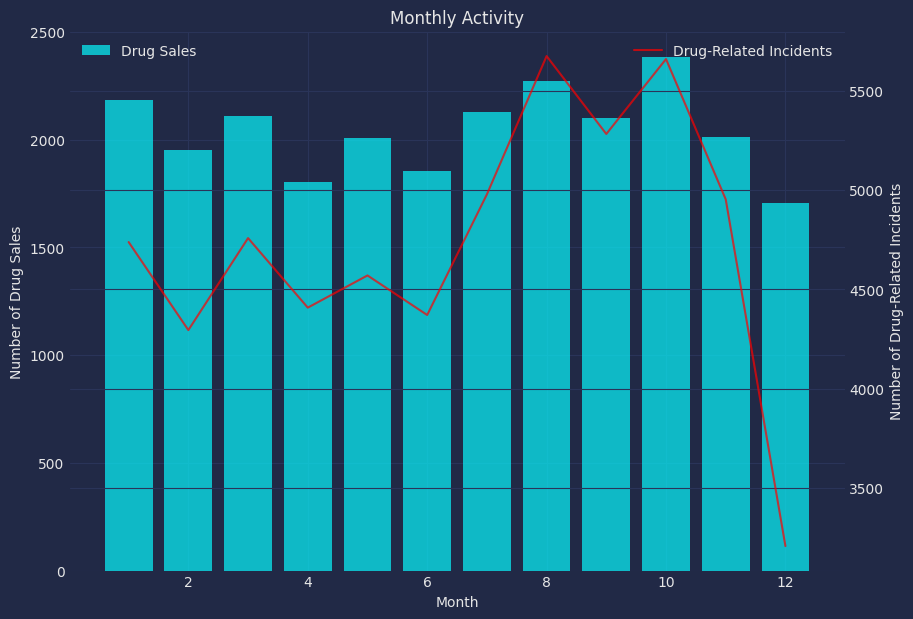

In [19]:
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use('cyberpunk')

# Monthly Activity
fig, ax1 = plt.subplots(figsize=(10, 7))

## Drugs Sales
monthly_drugs_sales = drugs_sales_df['cmplnt_fr_dt'].dt.month.value_counts().sort_index()

ax1.bar(drugs_related_df['cmplnt_fr_dt'].dt.month.value_counts().sort_index().index, monthly_drugs_sales, alpha=0.7)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Drug Sales')
ax1.legend(['Drug Sales'], loc="upper left")

ax1.set_title('Monthly Activity')

## Drug-Related Incidents

ax2 = ax1.twinx()
monthly_drugs_related = drugs_related_df['cmplnt_fr_dt'].dt.month.value_counts().sort_index()
monthly_drugs_related.plot(kind='line', alpha=0.7, color='red')
ax2.set_ylabel('Number of Drug-Related Incidents')
ax2.legend(['Drug-Related Incidents'], loc="upper right")

plt.show()



In [20]:
print(drugs_sales_df['cmplnt_fr_dt'].dt.year.value_counts().shape)
print(drugs_related_df['cmplnt_fr_dt'].dt.year.value_counts().shape)

(22,)
(25,)


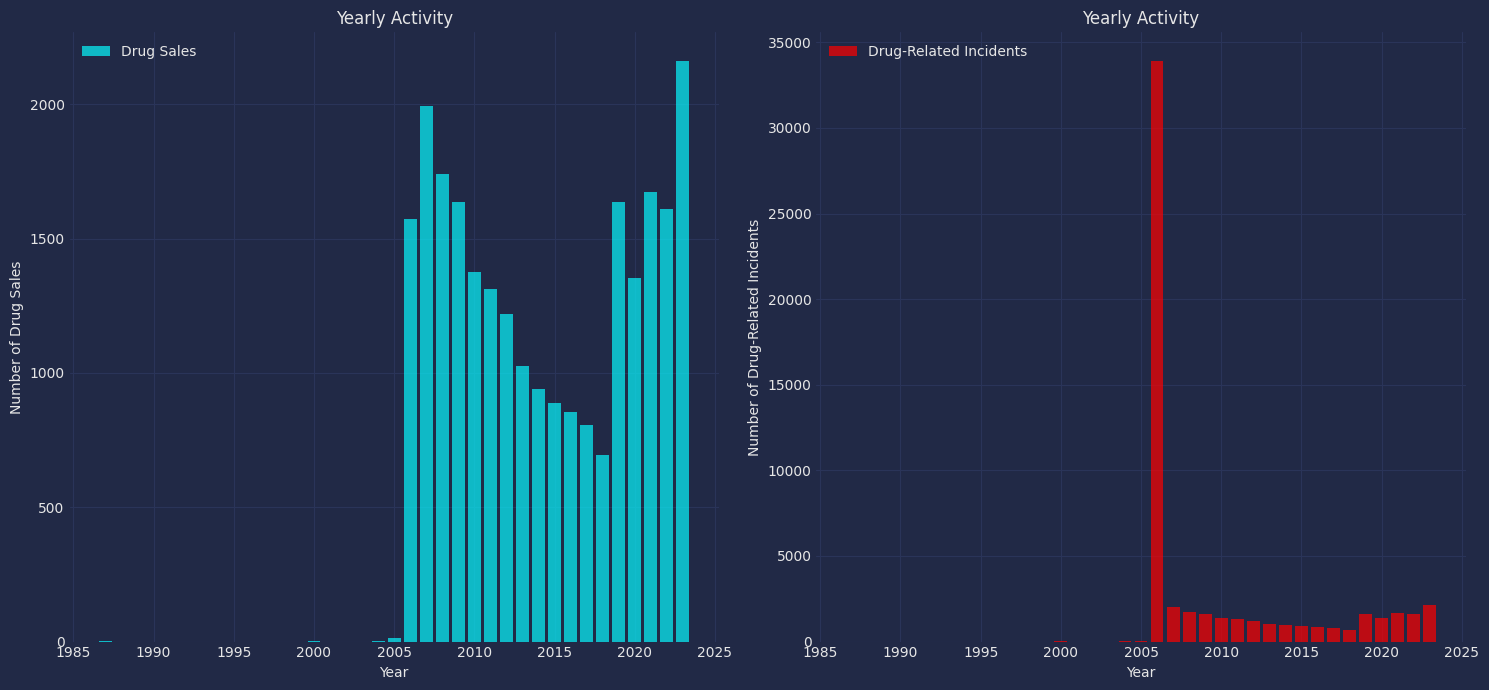

In [21]:
import matplotlib.pyplot as plt

# Yearly Activity
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 7))  # Create two subplots

# Keep only intersection of years
common_years = set(drugs_sales_df['cmplnt_fr_dt'].dt.year).intersection(set(drugs_related_df['cmplnt_fr_dt'].dt.year))
drugs_sales_df = drugs_sales_df[drugs_sales_df['cmplnt_fr_dt'].dt.year.isin(common_years)]
drugs_related_df = drugs_related_df[drugs_related_df['cmplnt_fr_dt'].dt.year.isin(common_years)]

## Drugs Sales
drugs_sales_df['cmplnt_fr_dt'] = pd.to_datetime(drugs_sales_df['cmplnt_fr_dt'])
yearly_activity = drugs_sales_df['cmplnt_fr_dt'].dt.year.value_counts().sort_index()
drugs_related_df['cmplnt_fr_dt'] = pd.to_datetime(drugs_related_df['cmplnt_fr_dt'])

ax3.bar(drugs_sales_df['cmplnt_fr_dt'].dt.year.value_counts().sort_index().index, yearly_activity, alpha=0.7)
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Drug Sales')
ax3.legend(['Drug Sales'], loc="upper left")
ax3.set_title('Yearly Activity')

## Drug-Related Incidents
ax4.bar(drugs_related_df['cmplnt_fr_dt'].dt.year.value_counts().sort_index().index, yearly_incidents, alpha=0.7, color='red')
ax4.set_xlabel('Year')
ax4.set_ylabel('Number of Drug-Related Incidents')
ax4.legend(['Drug-Related Incidents'], loc="upper left")
ax4.set_title('Yearly Activity')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

/tmp/ipykernel_47751/1931244656.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  drugs_sales_df['cmplnt_fr_tm'] = pd.to_datetime(drugs_sales_df['cmplnt_fr_tm'])
/tmp/ipykernel_47751/1931244656.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  drugs_related_df['cmplnt_fr_tm'] = pd.to_datetime(drugs_related_df['cmplnt_fr_tm'])


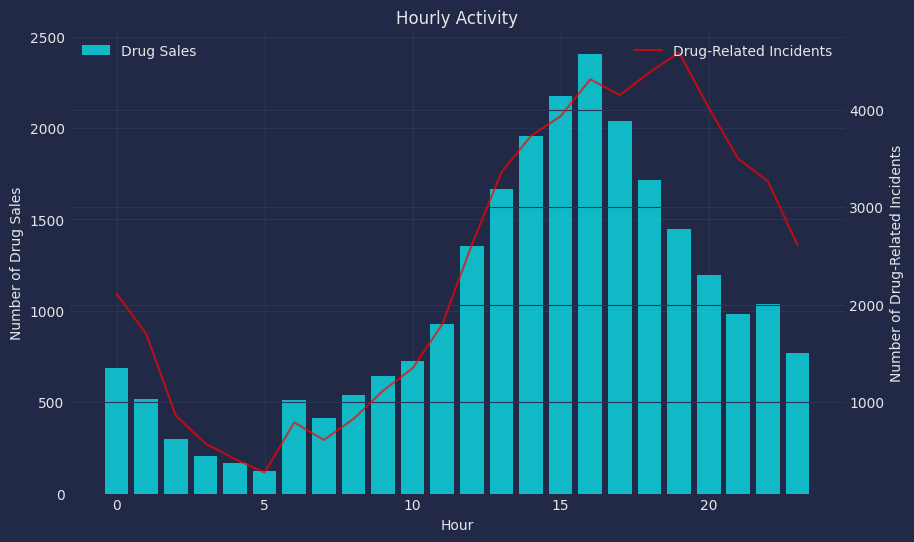

In [22]:
import matplotlib.pyplot as plt

# Hourly Activity
fig, ax = plt.subplots(figsize=(10, 6))

# Drug Sales
drugs_sales_df['cmplnt_fr_tm'] = pd.to_datetime(drugs_sales_df['cmplnt_fr_tm'])
hourly_activity_sales = drugs_sales_df['cmplnt_fr_tm'].dt.hour.value_counts().sort_index()
ax.bar(hourly_activity_sales.index, hourly_activity_sales, alpha=0.7)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Drug Sales')
ax.set_title('Hourly Activity')
ax.legend(['Drug Sales'], loc="upper left")

# Drug-Related Incidents
ax2 = ax.twinx()
drugs_related_df['cmplnt_fr_tm'] = pd.to_datetime(drugs_related_df['cmplnt_fr_tm'])
hourly_activity_related = drugs_related_df['cmplnt_fr_tm'].dt.hour.value_counts().sort_index()
ax2.plot(hourly_activity_related.index, hourly_activity_related, alpha=0.7, color='red')
ax2.set_ylabel('Number of Drug-Related Incidents')
ax2.legend(['Drug-Related Incidents'], loc="upper right")

plt.show()

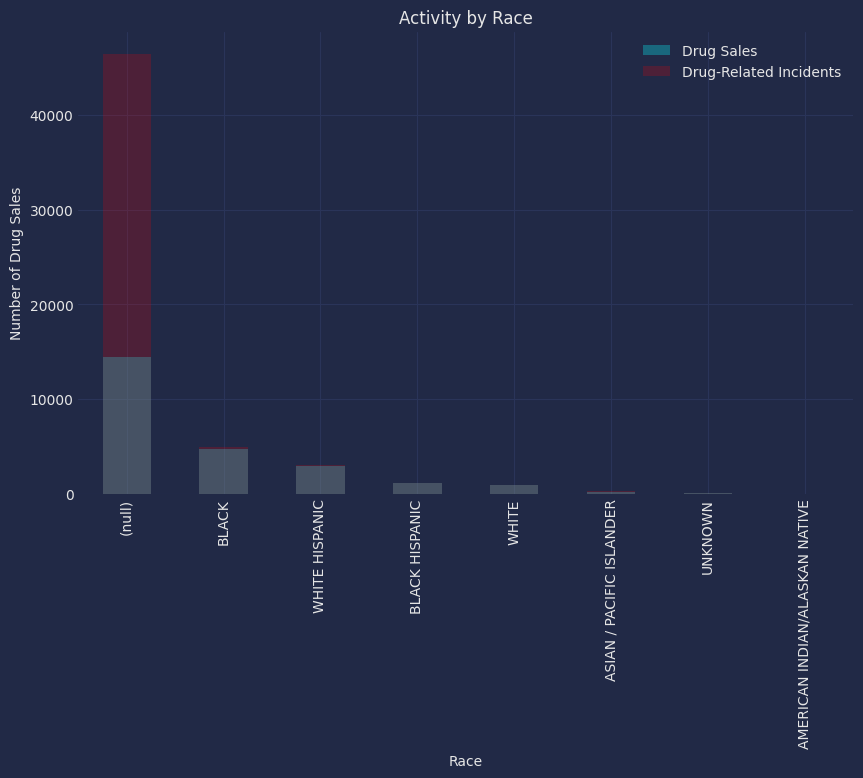

In [23]:
import matplotlib.pyplot as plt

# Activity by Race
plt.figure(figsize=(10, 6))
race_activity_sales = drugs_sales_df['susp_race'].value_counts()
race_activity_related = drugs_related_df['susp_race'].value_counts()

race_activity_sales.plot(kind='bar', alpha=0.3)
race_activity_related.plot(kind='bar', alpha=0.2, color='red')

plt.xlabel('Race')
plt.ylabel('Number of Drug Sales')
plt.title('Activity by Race')
plt.legend(['Drug Sales', 'Drug-Related Incidents'])
plt.show()